In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


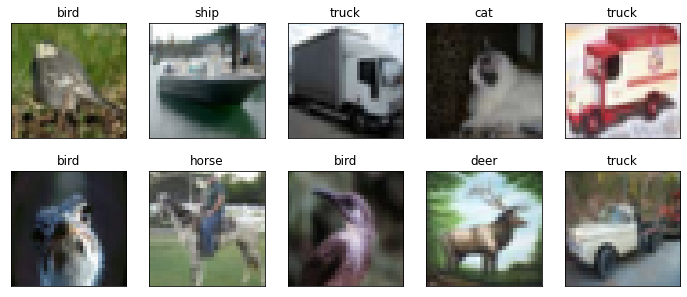

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog','frog','horse','ship', 'truck']

samples = np.random.randint(len(X_train), size=10)

plt.figure(figsize=(12,5))
for i, idx in enumerate(samples):
  plt.subplot(2,5,i+1,xticks=[], yticks=[])
  plt.title((class_names[y_train[idx][0]]))
  plt.imshow(X_train[idx])
plt.show()

In [ ]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size = 0.3, random_state = 42)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(35000, 32, 32, 3) (35000, 1)
(15000, 32, 32, 3) (15000, 1)
(10000, 32, 32, 3) (10000, 1)


In [ ]:
y_train = y_train.reshape(-1)
y_val = y_val.reshape(-1)
y_test = y_test.reshape(-1)

print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(35000,)
(15000,)
(10000,)


In [ ]:
import tensorflow as tf

y_train_oh = tf.one_hot(y_train, depth=10)
y_val_oh = tf.one_hot(y_val, depth=10)
y_test_oh = tf.one_hot(y_test, depth=10)

print(y_train_oh.shape)
y_train_oh[:5]

(35000, 10)


<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)>

In [ ]:
y_train_oh = y_train_oh.numpy()
y_val_oh = y_val_oh.numpy()
y_test_oh = y_test_oh.numpy()

print(y_train_oh.shape)
print(y_val_oh.shape)
print(y_test_oh.shape)

(35000, 10)
(15000, 10)
(10000, 10)


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

def build_model():
  model = keras.Sequential()

  model.add(layers.Conv2D(32, 3, padding = 'same',
                          activation='relu', input_shape = (32,32,3)))
  model.add(layers.MaxPool2D(2))
  model.add(layers.Dropout(0.3))

  model.add(layers.Conv2D(64, 3, padding = 'same',
                          activation='relu'))
  model.add(layers.MaxPool2D(2))
  model.add(layers.Dropout(0.3))

  model.add(layers.Conv2D(256, 3, padding = 'same',
                          activation='relu'))
  model.add(layers.MaxPool2D(2))
  model.add(layers.Dropout(0.3))

  model.add(layers.Conv2D(256, 3, padding = 'same',
                          activation='relu'))
  model.add(layers.MaxPool2D(2))
  model.add(layers.Dropout(0.3))

  model.add(layers.Flatten())
  model.add(layers.Dense(256, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))

  return model

In [ ]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 64)          0

In [ ]:
adam = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=adam,
              loss = 'categorical_crossentropy',
              metrics=['acc'])

EPOCHS = 100
BATCH_SIZE = 256
history = model.fit(X_train, y_train_oh,
                    epochs = EPOCHS,
                    batch_size = BATCH_SIZE,
                    validation_data = (X_val, y_val_oh))

Epoch 1/100
137/137 [==============================] - 15s 30ms/step - loss: 2.1797 - acc: 0.1780 - val_loss: 2.0490 - val_acc: 0.2440
Epoch 2/100
137/137 [==============================] - 3s 19ms/step - loss: 1.9298 - acc: 0.2919 - val_loss: 1.9832 - val_acc: 0.2703
Epoch 3/100
137/137 [==============================] - 3s 19ms/step - loss: 1.7713 - acc: 0.3551 - val_loss: 1.8625 - val_acc: 0.3244
Epoch 4/100
137/137 [==============================] - 3s 21ms/step - loss: 1.6887 - acc: 0.3843 - val_loss: 1.7668 - val_acc: 0.3702
Epoch 5/100
137/137 [==============================] - 3s 22ms/step - loss: 1.6324 - acc: 0.4039 - val_loss: 1.6901 - val_acc: 0.3876
Epoch 6/100
137/137 [==============================] - 3s 20ms/step - loss: 1.5790 - acc: 0.4219 - val_loss: 1.6512 - val_acc: 0.4043
Epoch 7/100
137/137 [==============================] - 3s 21ms/step - loss: 1.5302 - acc: 0.4423 - val_loss: 1.5913 - val_acc: 0.4269
Epoch 8/100
137/137 [==============================] - 3s 19m

In [ ]:
import pandas as pd

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize=(16,8))
  plt.subplot(1,2,1)
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.plot(hist['epoch'], hist['loss'], label='Train Loss')
  plt.plot(hist['epoch'], hist['val_loss'], label='Val Loss')
  plt.legend()

  plt.subplot(1,2,2)
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(hist['epoch'], hist['acc'], label='Train Accuracy')
  plt.plot(hist['epoch'], hist['val_acc'], label='Val Accuracy')
  plt.legend()
  plt.show()

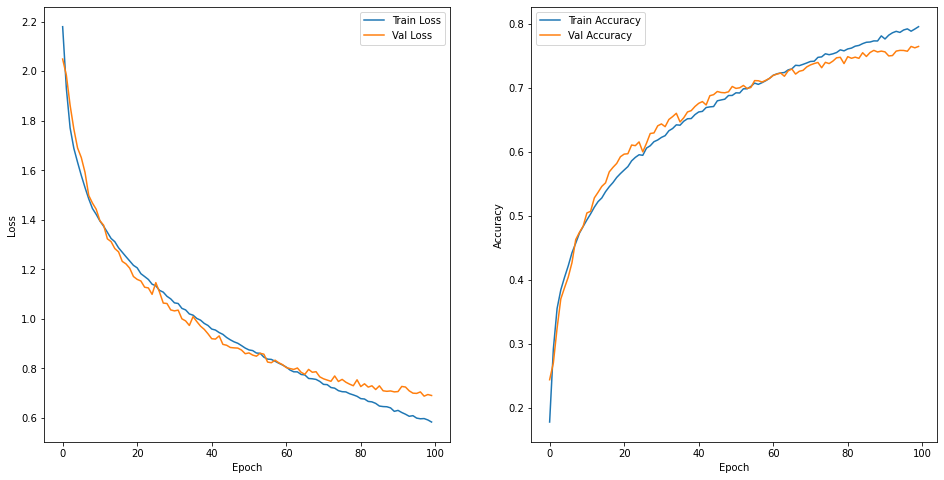

In [ ]:
plot_history(history)

In [ ]:
y_pred = model.predict(X_test)
y_pred_argmax = np.argmax(y_pred, axis=1)

313/313 [==============================] - 1s 2ms/step


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_matrix(y_test, y_pred):
  plt.figure(figsize = (10, 8))
  cm = confusion_matrix(y_test, y_pred)
  sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')
  plt.xlabel('predicted label', fontsize = 15)
  plt.ylabel('tyue label', fontsize = 15)
  plt.show()

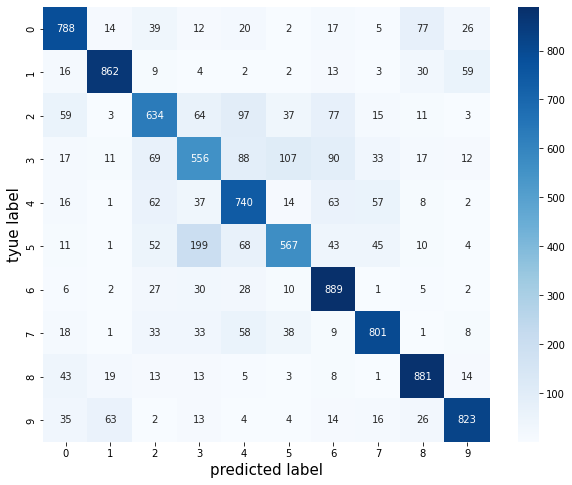

In [ ]:
plot_matrix(y_test, y_pred_argmax)